# Import

In [1]:
import pandas as pd
import statistics
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
from matplotlib import rcParams

# Dataset refactoring

In [2]:
OilData = pd.read_csv('BrentOilPrices.csv', sep=';')
GoldData = pd.read_csv('GOLDPMGBD228NLBM.csv', sep=';')
SnpData = pd.read_csv('S&P.csv', sep=';')

In [3]:
OilData.describe(include='all')

,Date,Price,Unnamed: 2
count,8360,8360.000000,0.0
unique,8360,NaN,NaN
top,20-May-87,NaN,NaN
freq,1,NaN,NaN
mean,NaN,46.459669,NaN
std,NaN,32.504671,NaN
min,NaN,9.100000,NaN
25%,NaN,18.780000,NaN
50%,NaN,31.750000,NaN
75%,NaN,67.042500,NaN


In [4]:
GoldData.describe(include='all')

,Date,GoldPrice
count,14000,14000
unique,14000,7852
top,1-Apr-68,.
freq,1,521


In [5]:
SnpData.pop('Unnamed: 2')
SnpData.pop('Unnamed: 3')
SnpData.pop('Unnamed: 4')
SnpData.pop('Unnamed: 5')
SnpData.pop('Unnamed: 6')
SnpData.pop('Unnamed: 7')
SnpData.pop('Unnamed: 8')
SnpData.describe(include='all')

,Date,S&Pprice
count,19685,19685.000000
unique,19685,NaN
top,30-Dec-27,NaN
freq,1,NaN
mean,NaN,619.286872
std,NaN,840.109381
min,NaN,4.400000
25%,NaN,68.560000
50%,NaN,134.770000
75%,NaN,1104.610000


In [6]:
OilData.pop('Unnamed: 2')
OilData.head(5000)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
4995,29-Dec-06,58.96
4996,2-Jan-07,58.49
4997,3-Jan-07,56.63
4998,4-Jan-07,54.58


In [7]:
GoldData.head(20000)

,Date,GoldPrice
0,1-Apr-68,37.700
1,2-Apr-68,37.300
2,3-Apr-68,37.600
3,4-Apr-68,36.950
4,5-Apr-68,37.000
...,...,...
13995,22-Nov-21,1816.05
13996,23-Nov-21,1789.15
13997,24-Nov-21,1782.05
13998,25-Nov-21,1788.15


In [8]:
OilData.rename(columns={'Price': 'OilPrice'}, inplace=True)
SnpData.rename(columns={'S&Pprice': 'SnpIndex'}, inplace=True)

In [9]:
SnpData.head(10)

,Date,SnpIndex
0,30-Dec-27,17.66
1,3-Jan-28,17.76
2,4-Jan-28,17.72
3,5-Jan-28,17.55
4,9-Jan-28,17.50
5,10-Jan-28,17.37
6,11-Jan-28,17.35
7,12-Jan-28,17.47
8,13-Jan-28,17.58
9,16-Jan-28,17.29


In [10]:
maindatafr = pd.merge(OilData, GoldData, on='Date')
maindatafr = pd.merge(maindatafr, SnpData, on='Date')

In [11]:
maindatafr.head(8215)

,Date,OilPrice,GoldPrice,SnpIndex
0,20-May-87,18.63,475.250,278.21
1,21-May-87,18.45,469.100,280.17
2,22-May-87,18.55,466.500,282.16
3,26-May-87,18.63,449.000,289.11
4,27-May-87,18.60,449.500,288.73
...,...,...,...,...
8210,6-Apr-20,22.58,1648.30,2663.68
8211,7-Apr-20,22.10,1649.25,2659.41
8212,8-Apr-20,25.22,1647.80,2749.98
8213,9-Apr-20,20.23,1680.65,2789.82


# Task №1

### median, mean, standart deviation Function

In [12]:
def stat(frcolumn):
    maindatafr.GoldPrice = pd.to_numeric(maindatafr.GoldPrice, errors='coerce')
    print('Median value -', frcolumn.median())
    print('Mean value -', frcolumn.mean())
    print('Standard deviation -', frcolumn.std())

### Oil Statistics
##### the average median and standard deviation can show little, since the financial price has changed a lot over 50 years of data collection

In [13]:
stat(maindatafr.OilPrice)

Median value - 31.95
Mean value - 46.637046228710474
Standard deviation - 32.62233417653077


### Gold Statistics
##### the situation is much better with gold, although the average price still has little to say

In [14]:
stat(maindatafr.GoldPrice)

Median value - 426.2
Mean value - 722.0100916295198
Standard deviation - 463.3202978064384


### S&P Statistics
##### here you can see that the mean and median values are very close to each other

In [15]:
stat(maindatafr.SnpIndex)

Median value - 1151.06
Mean value - 1206.0026922141158
Standard deviation - 716.215854604752


# Task №2

## fluctuations index S&P
### on this graph, you can see the economic crises of the United States (where the index is falling sharply), for example, after stable growth since 2011, in 2020, you can see the crisis due to the coronavirus


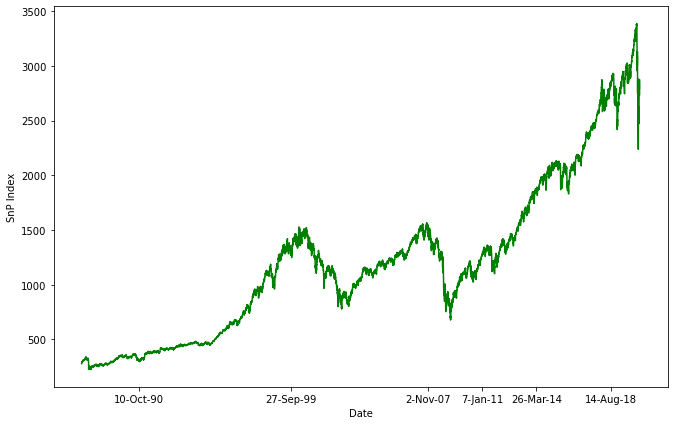

In [29]:
plt.plot(maindatafr.Date, maindatafr.SnpIndex, 'g')
plt.rcParams['figure.figsize'] = 11, 7
plt.xticks([850, 3080, 5100, 5900, 6700, 7800])
plt.xlabel('Date')
plt.ylabel('SnP Index')
plt.show()

## fluctuations Oil Prices
### you can see fluctuations in the price of oil occurring due to economic crises and the development of technology

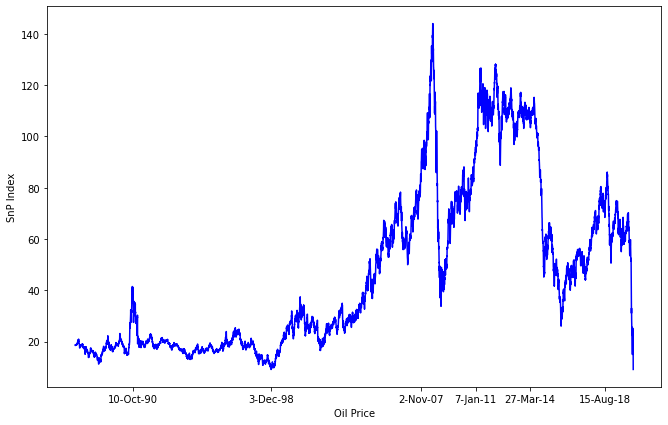

In [17]:
plt.plot(maindatafr.Date, maindatafr.OilPrice, 'b')
plt.rcParams['figure.figsize'] = 11, 7
plt.xticks([850, 2880, 5100, 5900, 6701, 7801])
plt.xlabel('Oil Price')
plt.ylabel('SnP Index')
plt.show()

## However, it is impossible to see something very interesting from individual graphs, so in the paragraph '2.5 or 3 - 0.5' I will compare these graphs. Now I want to put forward a few assumptions in order to confirm or refute them in the future

### 1) The trends for the increase in gold, oil and the SnP index will coincide
### 2) The trends for the increase in gold and the SnP index will coincide

# Task №2,5 or 3 - 0,5

### The first thing you can see here and immediately refute my assumption is that the price of gold has reverse trends to the index. When the index falls, the price of gold rises. For example, this can be seen during the crisis in 2008 - 2011.

### Because gold is the most reserve asset of all. When people stop believing in stocks or money, they invest in gold. This is a classic addiction: the market is down, gold is up

### in 2007, we see a jump in oil prices during the same period, the index value rises strongly. However, in 2011 - 2014, the index is growing despite the fact that the price of oil remains unchanged, which means that the price of oil by this time is not so much affecting the US economy

### Moreover, it is interesting that in 2020 we see a drop in both the index and prices for all resources, which is an exception for gold. The black swan - when no one knew what was going on and people didn't know where to invest money

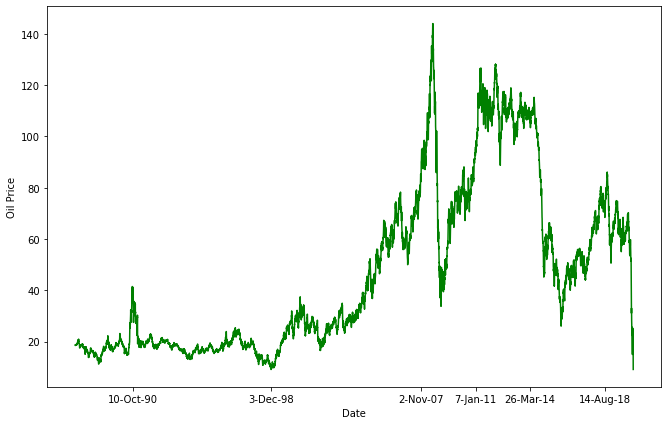

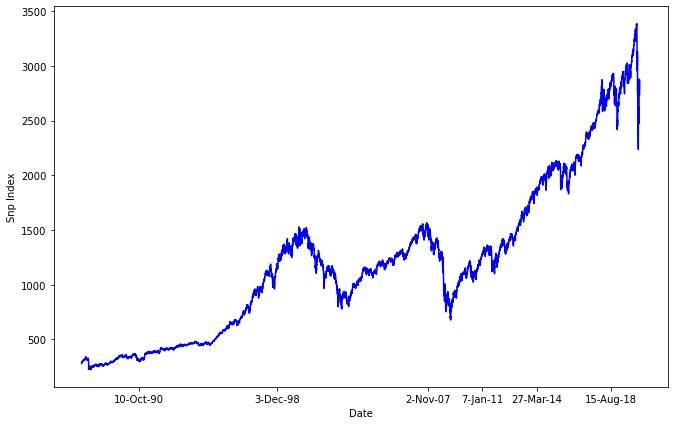

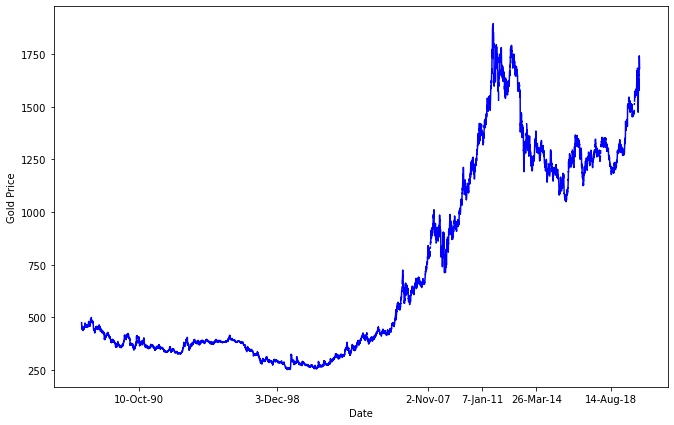

In [18]:
plt.plot(maindatafr.Date, maindatafr.OilPrice, 'g')
plt.rcParams['figure.figsize'] = 11, 7
plt.xticks([850, 2880, 5100, 5900, 6700, 7800])
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.show()
plt.plot(maindatafr.Date, maindatafr.SnpIndex, 'b')
plt.rcParams['figure.figsize'] = 11, 7
plt.xticks([850, 2880, 5100, 5900, 6701, 7801])
plt.xlabel('Date')
plt.ylabel('Snp Index')
plt.show()
plt.plot(maindatafr.Date, maindatafr.GoldPrice, 'b')
plt.rcParams['figure.figsize'] = 11, 7
plt.xticks([850, 2880, 5100, 5900, 6700, 7800])
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

# Task №3

### the lower right corner is empty, which means that there was no such moment when oil was worth a lot and gold was worth a little. And there are a lot of dots in the lower left corner, which means that for a very long time gold and oil were cheap at the same time. The lower right corner is empty, which means that there was no such moment when oil was worth a lot and gold was worth a little.
### This shows a direct relationship between the prices of gold and oil.
### Strong deviations from the pattern are economic crises

Text(0.5, 0, 'Oil Price')

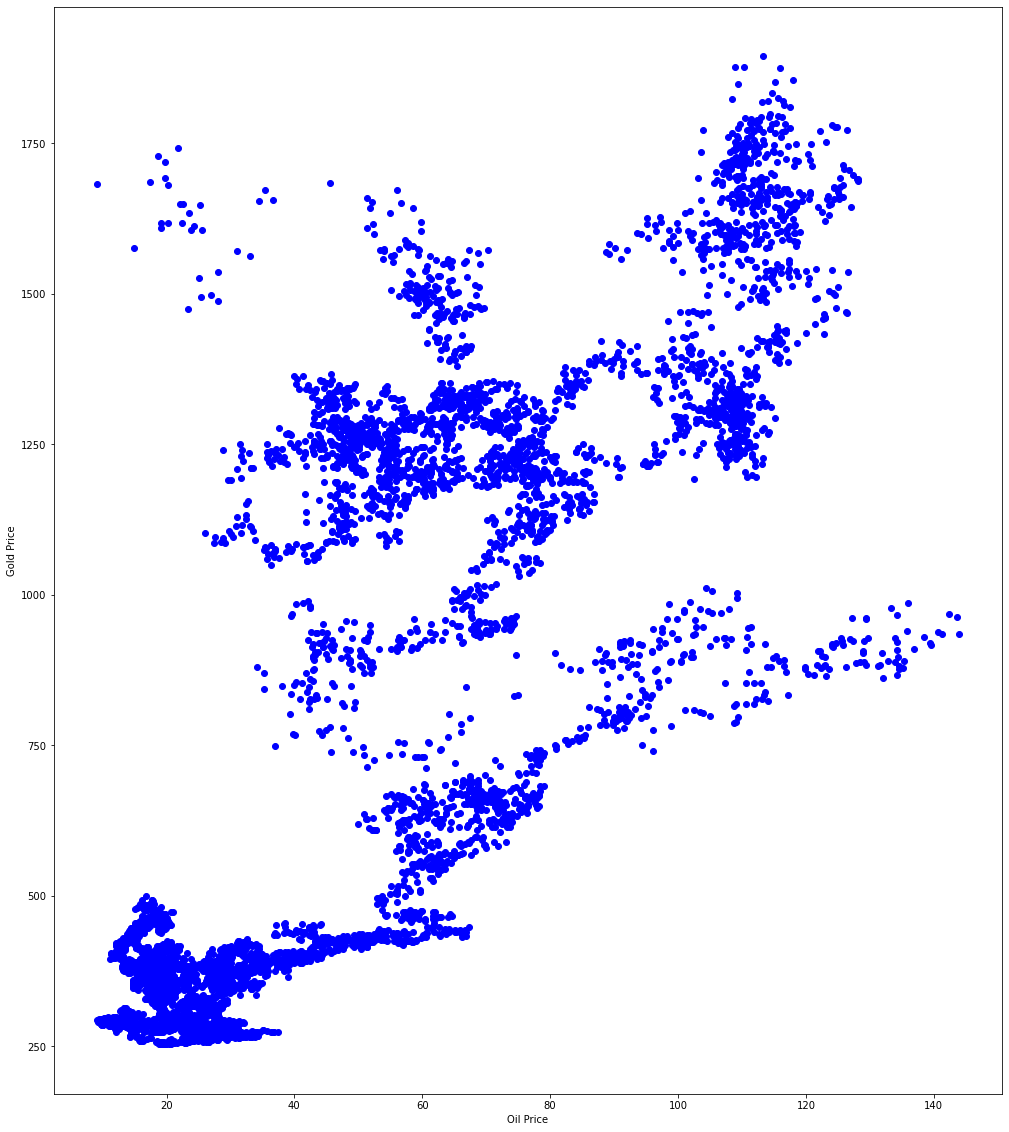

In [25]:
plt.plot(maindatafr.OilPrice, maindatafr.GoldPrice, 'bo')
plt.rcParams['figure.figsize'] = 17, 20
plt.ylabel('Gold Price')
plt.xlabel('Oil Price')

### Here we see a very similar pattern. However, at the interval of 1000 - 1500 of the index, we are seeing a rise in gold - a bad economic situation.

Text(0.5, 0, 'SnP Index')

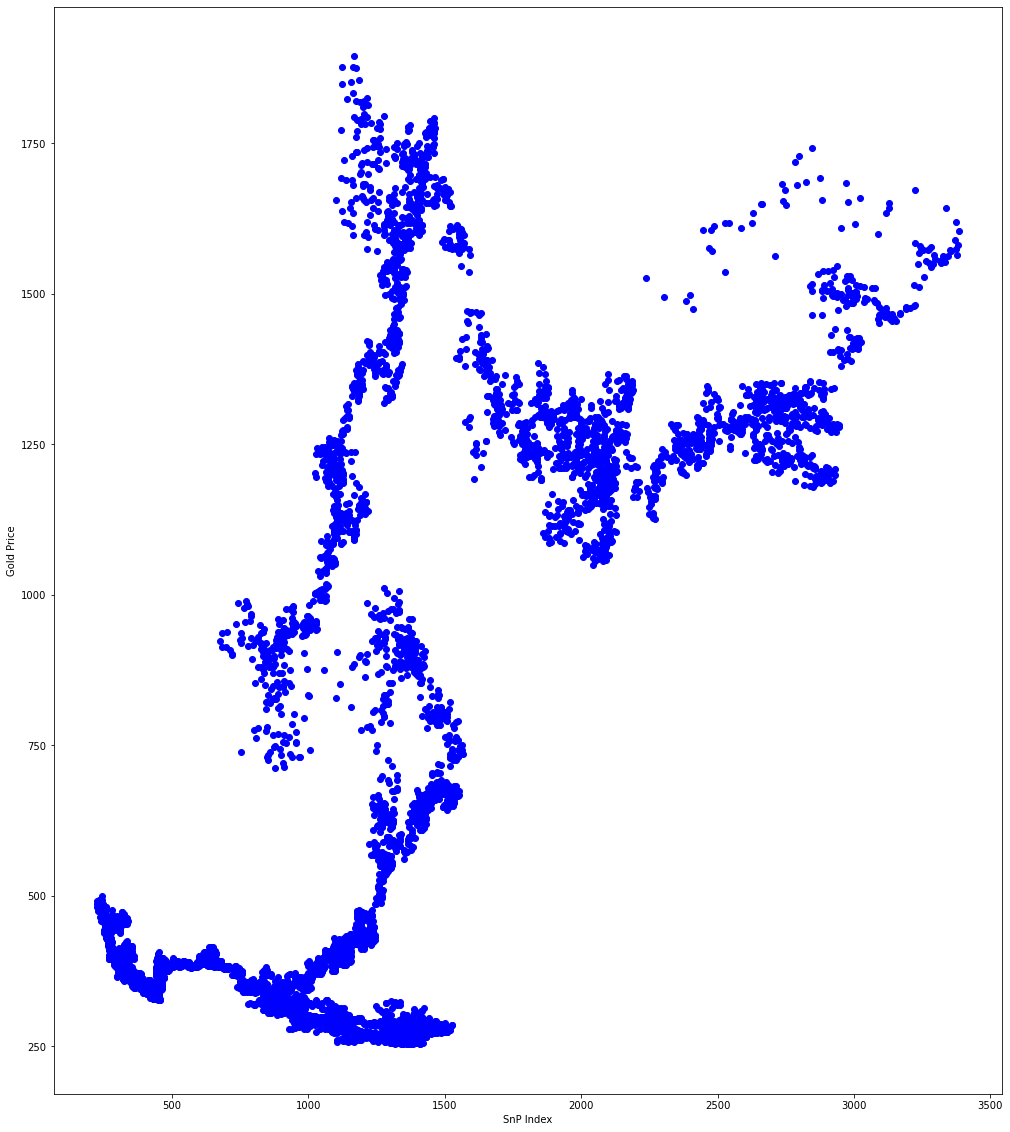

In [26]:
plt.plot(maindatafr.SnpIndex, maindatafr.GoldPrice, 'bo')
plt.rcParams['figure.figsize'] = 17, 20
plt.ylabel('Gold Price')
plt.xlabel('SnP Index')

### Here we see that the higher the index (the better the economy) the less dependent it becomes on the price of oil

Text(0.5, 0, 'Oil Price')

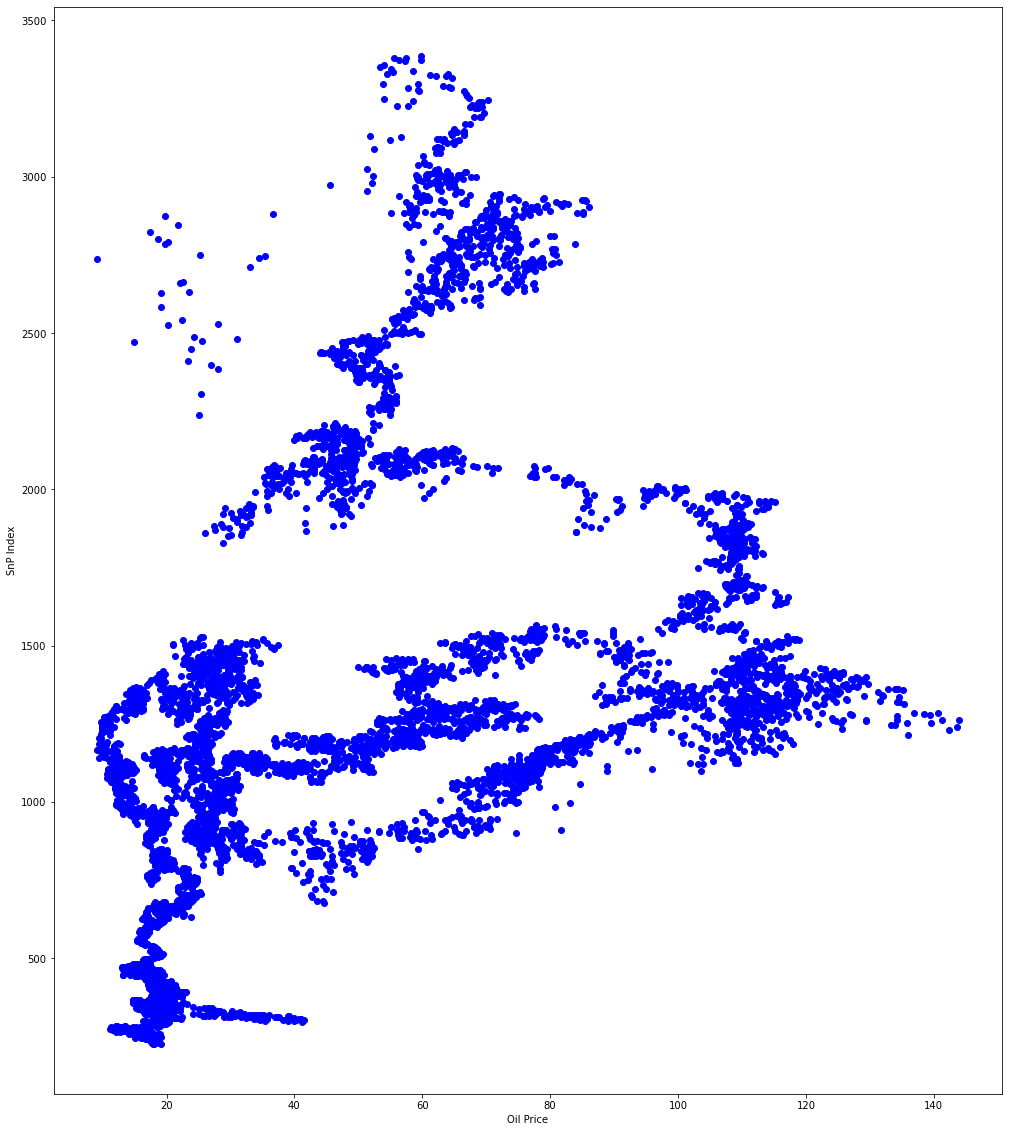

In [27]:
plt.plot(maindatafr.OilPrice, maindatafr.SnpIndex, 'bo')
plt.rcParams['figure.figsize'] = 17, 20
plt.ylabel('SnP Index')
plt.xlabel('Oil Price')

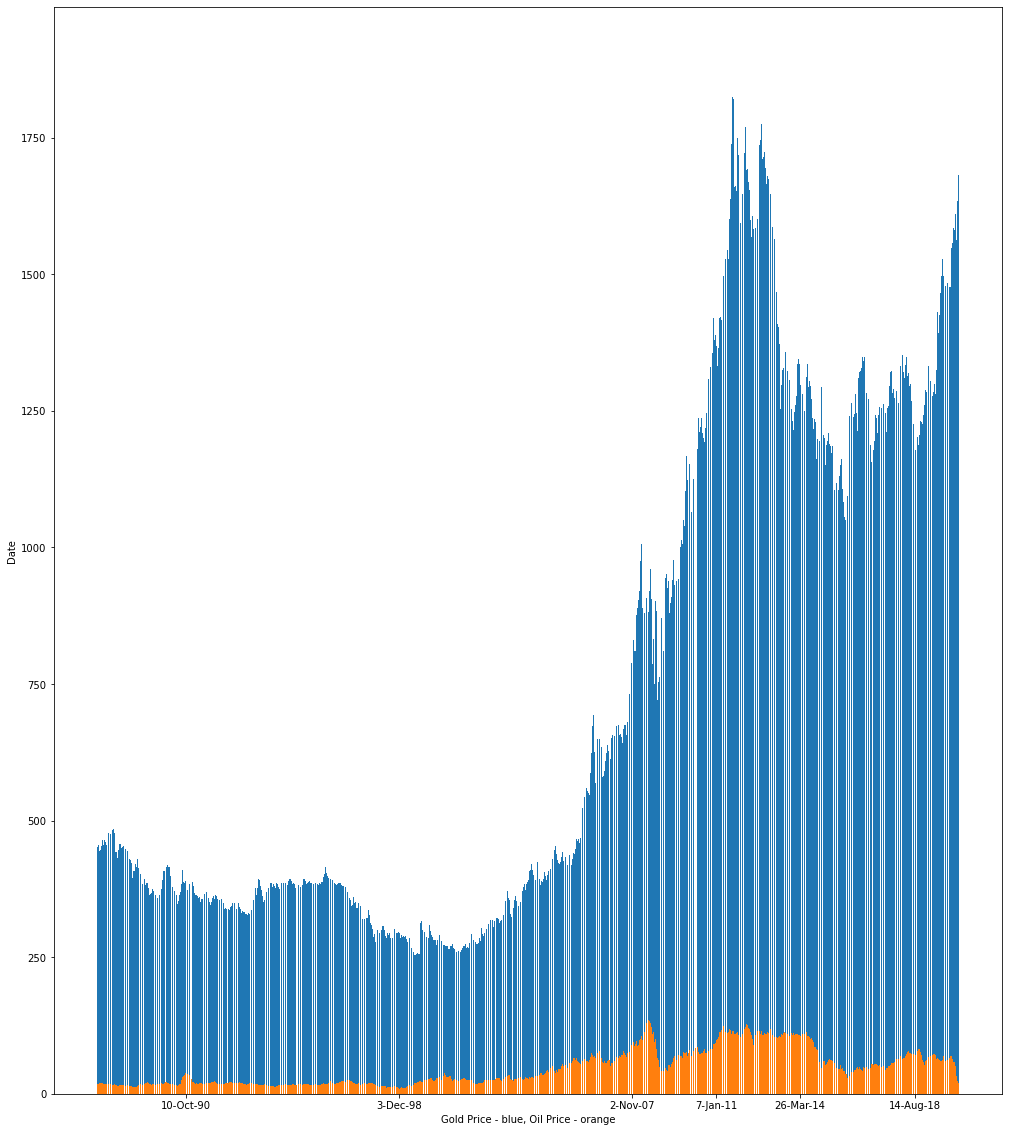

In [22]:
plt.bar(maindatafr.Date, maindatafr.GoldPrice)
plt.bar(maindatafr.Date, maindatafr.OilPrice)
plt.xticks([850, 2880, 5100, 5900, 6700, 7800])
plt.ylabel('Gold Price - blue, Oil Price - orange')
plt.xlabel('Date')
plt.show()